In [36]:
import numpy as np

def dBmTomW(PdBm):
    return 10**(PdBm/10.0)

# this is the spreading factor interaction matrix derived from lab tests
interactionMatrix = np.array([
    [dBmTomW(6), dBmTomW(-7), dBmTomW(-7), dBmTomW(-7), dBmTomW(-7), dBmTomW(-7)],
    [dBmTomW(-10), dBmTomW(6), dBmTomW(-10), dBmTomW(-10), dBmTomW(-10), dBmTomW(-10)],
    [dBmTomW(-12.5), dBmTomW(-12.5), dBmTomW(6), dBmTomW(-12.5), dBmTomW(-12.5), dBmTomW(-12.5)],
    [dBmTomW(-15), dBmTomW(-15), dBmTomW(-15), dBmTomW(6), dBmTomW(-15), dBmTomW(-15)],
    [dBmTomW(-17.5), dBmTomW(-17.5), dBmTomW(-17.5), dBmTomW(-17.5), dBmTomW(6), dBmTomW(-17.5)],
    [dBmTomW(-20), dBmTomW(-20), dBmTomW(-20), dBmTomW(-20), dBmTomW(-20), dBmTomW(6)]])

P1 = np.array([0., 1., 0., 0., 0., 0.]).reshape(6,1)

P2 = np.array([0., 0.5, 0., 0., 0., 0.]).reshape(6,1)


print P1[1,:] > np.dot(interactionMatrix[1,:], P2)


[False]


In [19]:
a = {12:34, 13:11}
print a

for i,j in a.viewitems():
    print "{} -> {}".format(i,j)

{12: 34, 13: 11}
12 -> 34
13 -> 11


In [3]:
def dBmTomW(pdBm):
    pmW = 10**(pdBm/10.0)
    return pmW

def dBmTofW(pdBm):
    pfW = 10**((pdBm+120.0)/10.0)
    return pfW

p = -130
print dBmTomW(p)
print dBmTofW(p)

1e-13
0.1


In [22]:
# log shadow model parameters
Ptx = 30 # in dBm
gamma = 2.2394
# d0 = 40.0 # in m
d0 = 40.0 # from drive tests
var = 0 # variance ignored for now. 
# Lpld0 = 127.41
Lpld0 = 95.0038 # from drive test
GL = 0


def getDistanceFromPL(pTX, pRX):
    d = d0*10**((pTX-pRX-Lpld0)/(10.0*gamma))
    return d

print getDistanceFromPL(30, -70)

66.8596954916


In [30]:
dict1 = {1:1, 4:2, 9:3}
dict2 = {2:10, 4:14, 9:20}
print dict1
print dict2
d = {}
dict1 = {x:dict1[x] for x in dict1.viewkeys() & dict2.viewkeys()}
print dict1

{1: 1, 4: 2, 9: 3}
{9: 20, 2: 10, 4: 14}
{9: 3, 4: 2}


In [59]:
import numpy as np

a = np.zeros((6,6))
a[3,0] = 4
print a
print a[3].shape

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 4.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
(6,)


In [61]:
def func():
    return True and not False


print func()

True


In [95]:
import numpy as np

a = np.linspace(902.3, 902.3 + 0.2*7, 8)

b =  np.random.permutation(a)

print b
print b[2]

[ 902.5  903.5  903.7  902.3  903.1  903.3  902.7  902.9]
903.7


In [4]:
import numpy as np

np.linspace(903000, 914200, 8, dtype=int)

array([903000, 904600, 906200, 907800, 909400, 911000, 912600, 914200])

In [17]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(xrange(5))
print G.nodes()
G.add_edge(0,1)
print G.edges()

[0, 1, 2, 3, 4]
[(0, 1)]


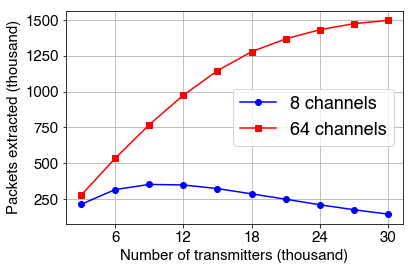

In [39]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

comparisonPlot = plt.figure()

nNodes = [3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000, 27000, 30000]
nRecv8channel = [213245, 316600, 352420, 348778, 323236, 286766, 249267, 210497, 175761, 145193]
nTrans8channel = [287730, 575471, 863750, 1149318, 1438300, 1729255, 2013949, 2300050, 2592253, 2877782]

nRecv64channel = [277041, 534349, 769070, 975439, 1146198, 1278757, 1368294, 1432426, 1474441, 1497572]
nTrans64channel = [287730, 575471, 863750, 1149318, 1438300, 1729255, 2013949, 2300050, 2592253, 2877782]

ch8, = plt.plot(nNodes, nRecv8channel, 'bo-', label='8 channels')
ch64, = plt.plot(nNodes, nRecv64channel, 'rs-', label='64 channels')

plt.grid()
plt.xlabel("Number of transmitters (thousand)")
plt.ylabel("Packets extracted (thousand)")

plt.legend(handles = [ch8,ch64], prop={'size':18})

plt.xticks([6000, 12000, 18000, 24000, 30000], [6, 12, 18, 24, 30])
plt.yticks([250000, 500000, 750000, 1000000, 1250000, 1500000], [250,500,750,1000,1250,1500])


plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 15

# pp = PdfPages('multipage.pdf')
# plt.savefig(pp,format='pdf')
# pp.close()
plt.tight_layout()
plt.savefig('8vs64channel.pdf', format='pdf')

plt.show()